In [0]:
%tensorflow_version 1.x
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv('drive/My Drive/deeplearningicp3/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
pureSentences = sentences
y = df['label'].values

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


tokenizing data

In [0]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

getting the vocabulary of data


In [0]:
sentences = tokenizer.texts_to_matrix(sentences)

In [0]:
import numpy as np
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [0]:
model = Sequential()




In [0]:
model.add(layers.Dense(300, activation='relu',input_dim=input_dim))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 5s 60us/step - loss: 0.8799 - acc: 0.5060 - val_loss: 0.8443 - val_acc: 0.5131
Epoch 2/5
75000/75000 [==============================] - 4s 59us/step - loss: 0.7899 - acc: 0.5793 - val_loss: 0.8447 - val_acc: 0.5129
Epoch 3/5
75000/75000 [==============================] - 4s 59us/step - loss: 0.6844 - acc: 0.6805 - val_loss: 0.8708 - val_acc: 0.5103
Epoch 4/5
75000/75000 [==============================] - 4s 59us/step - loss: 0.4944 - acc: 0.8178 - val_loss: 0.9479 - val_acc: 0.5068
Epoch 5/5
75000/75000 [==============================] - 4s 59us/step - loss: 0.2896 - acc: 0.9228 - val_loss: 1.0854 - val_acc: 0.4993


In [0]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)


176408
2470


In [0]:
# from keras.layers import Embedding
# X_train.shape


In [0]:
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [0]:
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 262s 3ms/step - loss: 1.0067 - acc: 0.4882 - val_loss: 0.8583 - val_acc: 0.4963
Epoch 2/5
75000/75000 [==============================] - 262s 3ms/step - loss: 0.8337 - acc: 0.5159 - val_loss: 0.8441 - val_acc: 0.5025
Epoch 3/5
75000/75000 [==============================] - 264s 4ms/step - loss: 0.7899 - acc: 0.5561 - val_loss: 0.8427 - val_acc: 0.5000
Epoch 4/5
75000/75000 [==============================] - 264s 4ms/step - loss: 0.7173 - acc: 0.6248 - val_loss: 0.8843 - val_acc: 0.4939
Epoch 5/5
75000/75000 [==============================] - 264s 4ms/step - loss: 0.6049 - acc: 0.7062 - val_loss: 0.9784 - val_acc: 0.4854


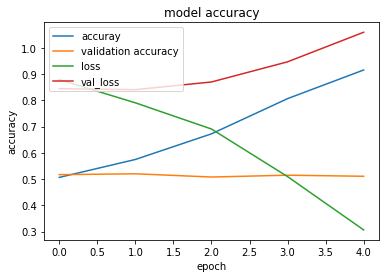

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [0]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)


In [0]:
sentences= twenty_train.data
y=twenty_train.target

In [0]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)


In [0]:
from keras.layers import Embedding, Flatten
n = Sequential()
n.add(Embedding(vocab_size, 50, input_length=max_review_len))
n.add(Flatten())
n.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
n.add(layers.Dense(20, activation='softmax'))
n.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [0]:
h2=n.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 147s 17ms/step - loss: 8.1215 - acc: 0.0519 - val_loss: 3.1498 - val_acc: 0.0555
Epoch 2/5
8485/8485 [==============================] - 140s 16ms/step - loss: 3.0074 - acc: 0.0599 - val_loss: 2.9924 - val_acc: 0.0534
Epoch 3/5
8485/8485 [==============================] - 144s 17ms/step - loss: 2.9658 - acc: 0.0656 - val_loss: 2.9797 - val_acc: 0.0608
Epoch 4/5
8485/8485 [==============================] - 140s 16ms/step - loss: 2.9410 - acc: 0.0737 - val_loss: 2.9580 - val_acc: 0.0672
Epoch 5/5
8485/8485 [==============================] - 142s 17ms/step - loss: 2.9026 - acc: 0.0860 - val_loss: 2.9243 - val_acc: 0.0820


In [0]:
x=model.predict_classes(X_test[[1],:])

In [0]:
print("Actual Prediction",y_test[1],"Predicted Prediction",x)

Actual Prediction 2 Predicted Prediction [1]


In [0]:
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/Colab Notebooks/logs/{}".format(time()))
model.fit(X_train,y_train,verbose=1,callbacks=[tensorboard], epochs=5)



Epoch 1/5
75000/75000 [==============================] - 14s 184us/step - loss: 0.4467 - acc: 0.8137

Epoch 2/5
75000/75000 [==============================] - 14s 184us/step - loss: 0.1865 - acc: 0.9422
Epoch 3/5
75000/75000 [==============================] - 14s 193us/step - loss: 0.1297 - acc: 0.9653
Epoch 4/5
75000/75000 [==============================] - 14s 187us/step - loss: 0.1132 - acc: 0.9720
Epoch 5/5
75000/75000 [==============================] - 14s 182us/step - loss: 0.0957 - acc: 0.9781


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
